In [8]:
# Importing the required libraries
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt


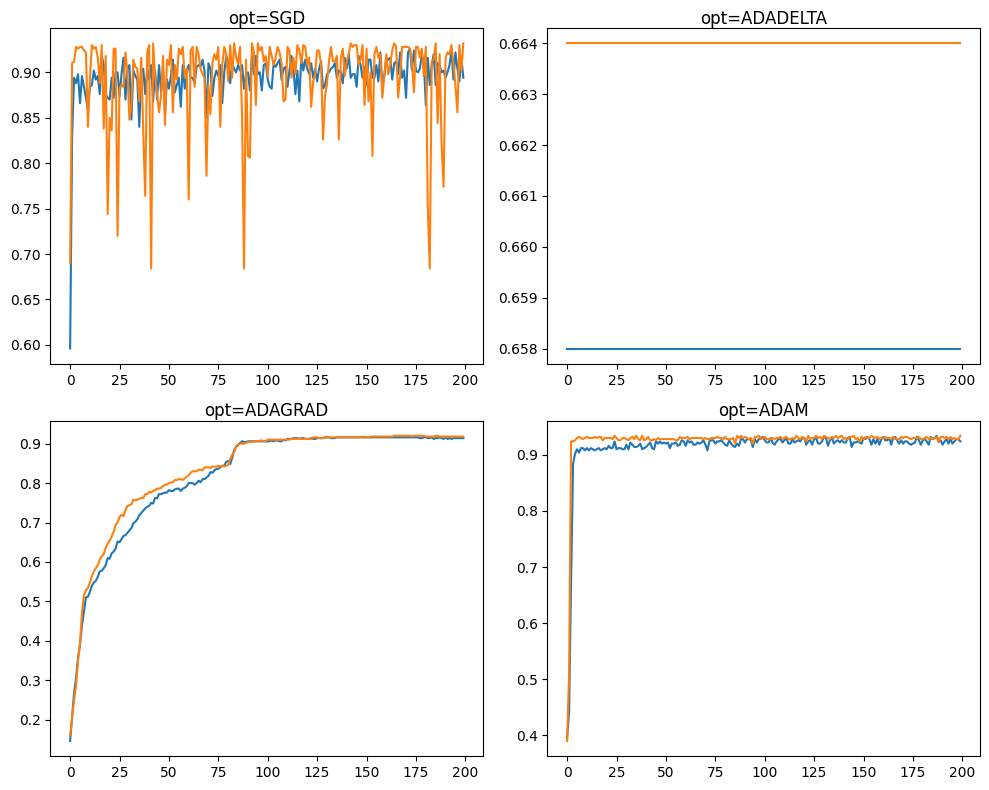

In [9]:
# Preparing the dataset for Training & Testing
def prepare_data():

    # Generating 2-D Classification Dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=1)

    # One- Hot Encoding to output variable "y"
    y = to_categorical(y)

    # Observations
    n_train = 500

    # Splitting into Train and Test
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]

    return trainX, trainy, testX, testy

def fit_model(trainX, trainy, testX, testy, optimizer):

    # Defining the model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(3, activation="softmax"))

    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    # Fitting the model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

    # Plotting Learning Curves
    plt.plot(history.history["accuracy"], label="train")
    plt.plot(history.history["val_accuracy"], label="test")
    plt.title("opt=" + optimizer, pad=-80)

# Preparing the Dataset
trainX, trainy, testX, testy = prepare_data()

# Creating the learning curves for different optimizers
optimizers=["SGD", "ADADELTA", "ADAGRAD", "ADAM"]

# Adjusting the Figure Size
plt.figure(figsize=(10, 8))

for i in range(len(optimizers)):

    # Determine the plot number
    plot_no = 220 + (i + 1)
    plt.subplot(plot_no)

    # Fitting the model and plotting learning rate for a learning rate
    fit_model(trainX, trainy, testX, testy, optimizers[i])

# Show the learning rate curves
plt.tight_layout()
plt.show()

- From the above learning curves we can able to see that in the Adam Optimizer the Traning & Testing Accuracy are very closed to each other.
- Observing the ADAM optimizer visualization we can see that within 25 epochs it hits more than 80% Accuracy,It means the faster convergence to reach the minimum value.
- By experimenting with different optimizers we can select the best one which gives the good results for model.